# Wrange

We will start with mall_customers database. 

- acquire: verify our acquire module is working
- summarize our data
- plot histograms + boxplots
- na's
- outliers
- astype()
- pd.cut()

## Acquire

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import acquire

In [3]:
df = acquire.get_mall_data()

## Summarize

In [4]:
df.shape

(200, 5)

In [5]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.dtypes

customer_id        int64
gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

**Takeaways**

1. encode gender
2. drop customer_id
3. define our target variable: spending_score

In [7]:
df.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

In [8]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Takeaways**
1. Not sure how annual income is computed, or what units it is in. 
2. I don't know what spending score means, I assuming higher spending score means more likely to spend, better to market to? 

### Plot distributions

Histograms

In [10]:
df.columns

Index(['customer_id', 'gender', 'age', 'annual_income', 'spending_score'], dtype='object')

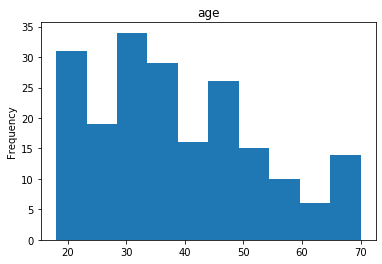

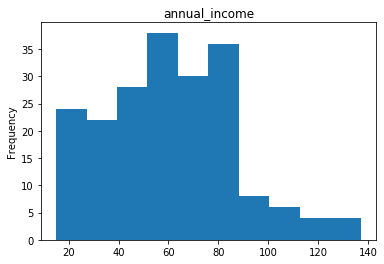

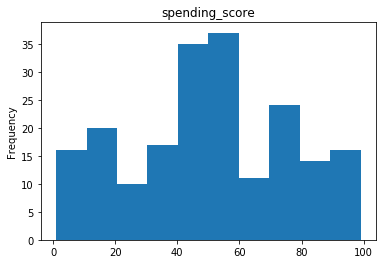

In [9]:
for col in ['age', 'annual_income', 'spending_score']:
    df[col].plot.hist(title=col)
    plt.show()

Boxplots

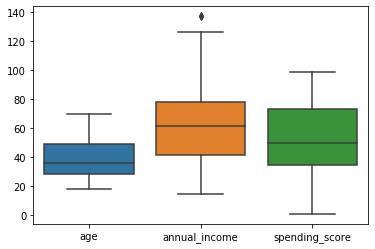

In [11]:
sns.boxplot(data=df[['age', 'annual_income', 'spending_score']])

 nulls, outliers, cut, dropna, fillna, replace, get_dummies
( think about if any new features to compute)
 train, validate, test split
 update prepare.py file to make necessary changes

In [13]:
df.isna().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

Takeaway: no nulls in our data set

**Cutting / Binning** lets us turn a continuous variable into a categorical one by putting the numerical feature into bins.

- `pd.cut` creates bins of equal width
- `pd.qcut` creates bins with the same number of observations in each

in both cases the range of the bins is determined from the data (but we could specify it ourselves)

This can be helpful for initial exploration, interpretation, and visualization.

In [17]:
pd.cut(df.age, bins=4).value_counts()

(17.948, 31.0]    70
(31.0, 44.0]      61
(44.0, 57.0]      43
(57.0, 70.0]      26
Name: age, dtype: int64

In [23]:
pd.DataFrame?

In [21]:
pd.qcut(df.age, 4).value_counts().sort_index()

(17.999, 28.75]    50
(28.75, 36.0]      54
(36.0, 49.0]       51
(49.0, 70.0]       45
Name: age, dtype: int64

In [22]:
pd.cut(df.age, bins=[0, 30, 50, 100]).value_counts()

(30, 50]     98
(0, 30]      62
(50, 100]    40
Name: age, dtype: int64

In [26]:
df['is_female'] = (df.gender == 'Female').astype('int')
df.head()

,customer_id,gender,age,annual_income,spending_score,is_female
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [29]:
from sklearn.model_selection import train_test_split

train_and_validate, test = train_test_split(df, test_size=.15, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.15, random_state=123)

print('train', train.shape)
print('test', test.shape)
print('validate', validate.shape)

train (144, 6)
test (30, 6)
validate (26, 6)


## Workflow

- notebook -> python script workflow
    1. Start out in a notebook
    1. Experiment and rapidly iterate
    1. Consolidate code and move into a .py script
    1. import the py script into our notebook
- our .py scripts will generally only contain functions
- data flow: acquire -> prepare -> exploration
- What are the benefits of a py script over a notebook?
    - we don't have to use a jupyter notebook
    - easier to transfer information
    - keep notebooks for showing insights -- backend in the backend
    - easier to share
    - easier to copy over / modify py scripts instead of notebooks
    - **we can import functions from py scripts** -- data pipeline reproducible + reusable
    - **better project organization**
- What are some downsides of py files?
    - harder to interpret comments
    - no kernels, the whole script has to be run at once
    - feedback loop is longer
    - if you're working by yourself this could provide minimal benefit
    - duplicated work between wrangle notebooks and scripts
    - harder to find errors
    - no markdown
- markdown
    - markdown gets turned into HTML
    - use a blank line to seperate paragraphs
    - `-`s or `*`s for bullet points
    - `#`s for headings
    - `$`s creates LaTeX code $H_0$
    - when in doubt, seperate things with a newline

# this is a 2nd level heading

# this is a heading

this is more text

- one
- two
- three

one

two

three

In [31]:
df = acquire.get_mall_data()

def prep_mall_data(df):
    '''
    Takes the acquired mall data, does data prep, and returns
    train, test, and validate data splits.
    '''
    df['is_female'] = (df.gender == 'Female').astype('int')
    train_and_validate, test = train_test_split(df, test_size=.15, random_state=123)
    train, validate = train_test_split(train_and_validate, test_size=.15, random_state=123)
    return train, test, validate

In [32]:
prep_mall_data?

In [ ]:
prep_mall_data(df)